In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
target = pd.read_csv('data/train_target.csv')

In [3]:

plt.style.use('ggplot')


%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('data/train.csv')
target = pd.read_csv('data/train_target.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

(627228, 11)
wagnum               int64
ts_id                int64
milleage_all       float64
axl1_l_w_flange    float64
axl1_r_w_flange    float64
axl2_l_w_flange    float64
axl2_r_w_flange    float64
axl3_l_w_flange    float64
axl3_r_w_flange    float64
axl4_l_w_flange    float64
axl4_r_w_flange    float64
dtype: object
['wagnum' 'ts_id' 'milleage_all' 'axl1_l_w_flange' 'axl1_r_w_flange'
 'axl2_l_w_flange' 'axl2_r_w_flange' 'axl3_l_w_flange' 'axl3_r_w_flange'
 'axl4_l_w_flange' 'axl4_r_w_flange']


<AxesSubplot: >

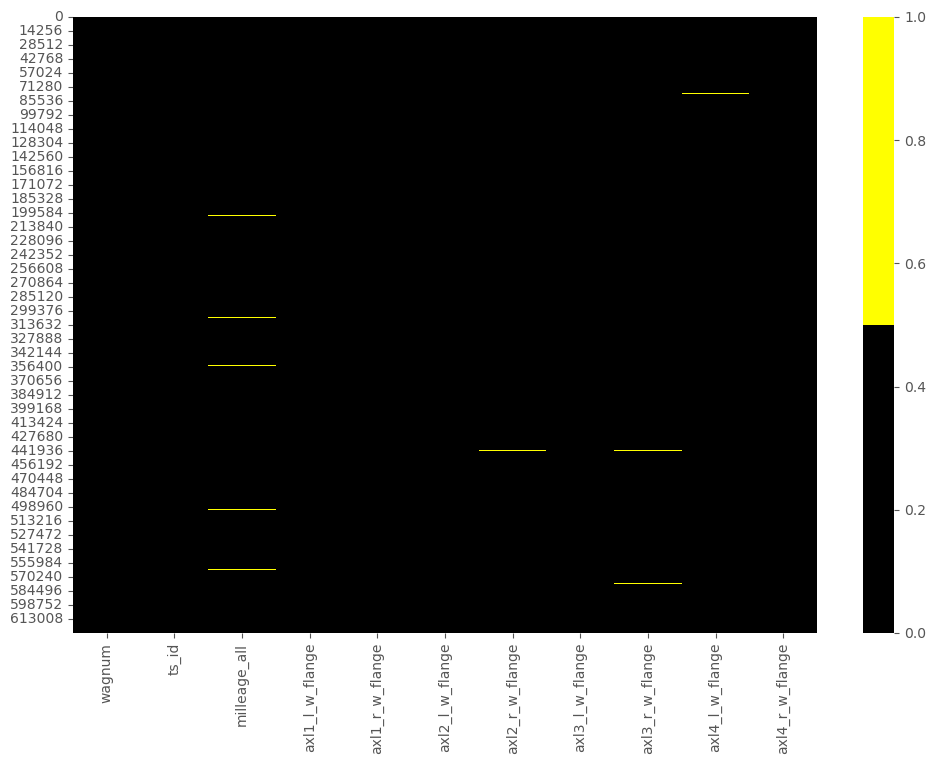

In [4]:
cols = df.columns 

colours = ['#000000', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

wagnum - 0%
ts_id - 0%
milleage_all - 0%
axl1_l_w_flange - 0%
axl1_r_w_flange - 0%
axl2_l_w_flange - 0%
axl2_r_w_flange - 0%
axl3_l_w_flange - 0%
axl3_r_w_flange - 0%
axl4_l_w_flange - 0%
axl4_r_w_flange - 0%


In [6]:
df['mes_id'] = df['wagnum'].apply(str) + '_' + df['ts_id'].apply(str)

In [7]:
# df

In [8]:
target['mes_id'] = target['wagnum'].apply(str) + '_' + target['ts_id'].apply(str)

In [9]:
target

,wagnum,ts_id,target,mes_id
0,2,3,38958.0,2_3
1,3,2,57253.0,3_2
2,5,4,9734.0,5_4
3,6,1,2604.0,6_1
4,8,4,17272.0,8_4
...,...,...,...,...
33007,37430,4,74694.0,37430_4
33008,37431,3,25790.0,37431_3
33009,37432,4,10211.0,37432_4
33010,37433,2,7526.0,37433_2


In [10]:
merged_df = pd.merge(df, target, on='mes_id')

In [11]:
merged_df

,wagnum_x,ts_id_x,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id,wagnum_y,ts_id_y,target
0,2,3,10371.0,28.6,29.7,28.6,28.8,30.4,29.3,29.9,28.3,2_3,2,3,38958.0
1,2,3,29448.0,28.8,29.1,28.0,27.8,30.1,28.9,29.1,27.8,2_3,2,3,38958.0
2,2,3,33963.0,28.6,29.1,28.3,28.5,29.8,29.4,29.7,28.3,2_3,2,3,38958.0
3,2,3,37184.0,29.0,29.7,29.1,29.0,30.0,30.2,29.0,28.0,2_3,2,3,38958.0
4,2,3,37637.0,29.0,29.0,28.5,29.4,30.0,29.9,28.9,28.7,2_3,2,3,38958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627223,37434,1,66338.0,30.2,29.4,26.8,28.9,28.8,29.4,29.3,30.3,37434_1,37434,1,22882.0
627224,37434,1,67618.0,30.4,29.2,26.9,29.0,29.1,29.5,29.9,29.9,37434_1,37434,1,22882.0
627225,37434,1,77566.0,29.9,28.9,27.0,30.0,28.6,29.2,29.9,29.7,37434_1,37434,1,22882.0
627226,37434,1,78849.0,29.8,29.3,27.0,29.2,28.1,28.5,29.6,30.0,37434_1,37434,1,22882.0


In [12]:
merged_df = merged_df.drop(['wagnum_y', 'ts_id_y'], axis=1)

In [13]:
merged_df.columns = ['wagnum', 'ts_id', 'milleage_all', 'axl1_l_w_flange',
       'axl1_r_w_flange', 'axl2_l_w_flange', 'axl2_r_w_flange',
       'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange',
       'axl4_r_w_flange', 'mes_id', 'target']

In [14]:
# merged_df.to_csv('train_with_target.csv', index=False)

In [15]:
merged_df = pd.read_csv('data/train_with_target.csv')

<AxesSubplot: >

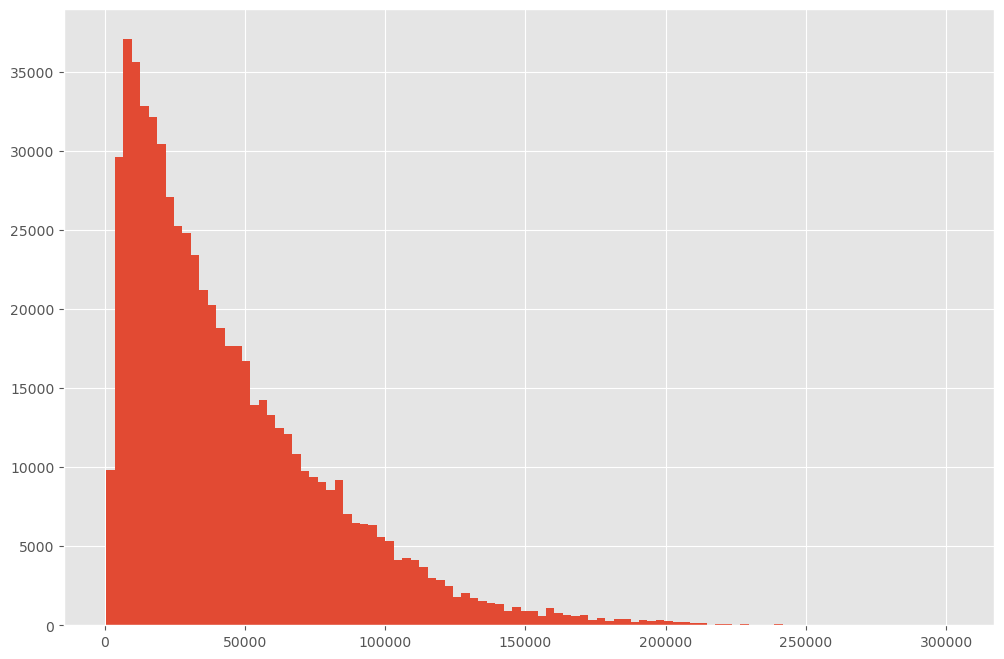

In [16]:
merged_df['target'].hist(bins=100)

In [17]:
merged_df = merged_df.sort_values(by='target')
merged_df.head()

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,mes_id,target
622844,37156,2,109038.0,30.3,27.5,28.3,30.7,27.5,29.9,30.4,29.8,37156_2,611.0
622841,37156,2,103366.0,30.5,28.5,29.4,30.6,28.0,31.2,30.6,30.9,37156_2,611.0
622840,37156,2,103366.0,30.4,27.8,29.5,30.9,28.5,30.2,31.0,30.2,37156_2,611.0
622839,37156,2,102246.0,30.4,28.2,29.3,30.6,28.1,30.4,31.0,30.4,37156_2,611.0
622842,37156,2,106810.0,30.2,27.5,29.2,30.5,28.2,29.5,29.9,30.3,37156_2,611.0


In [18]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


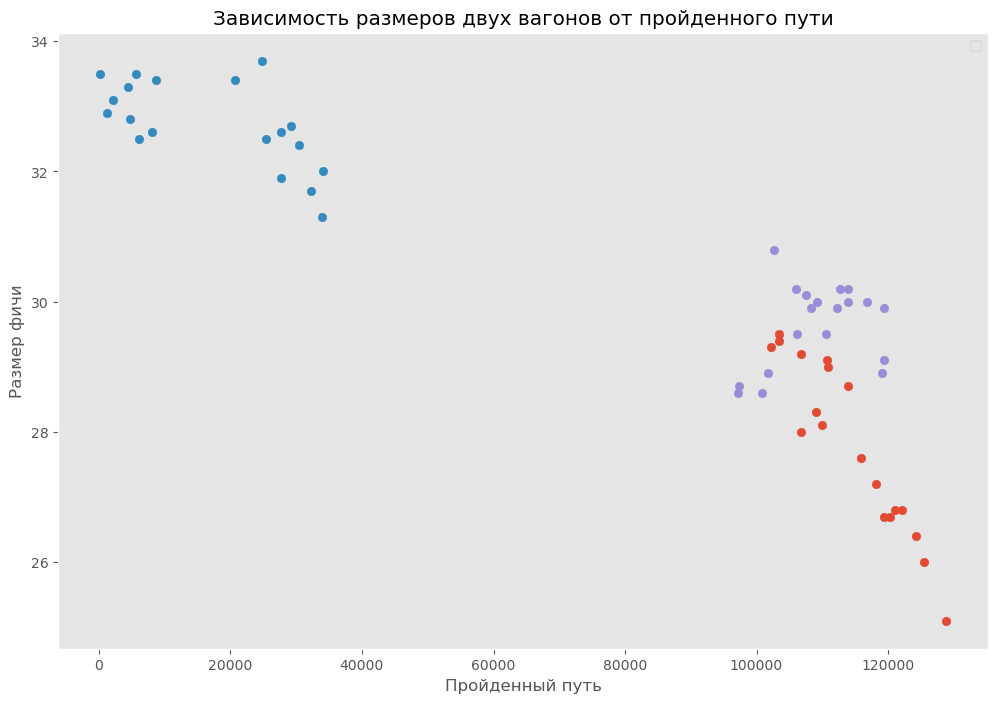

In [19]:
#for m in measures:
m = "axl2_l_w_flange"
plt.scatter(merged_df[merged_df['mes_id']=="37156_2"]['milleage_all'], merged_df[merged_df['mes_id']=="37156_2"][m])#, color='C0')#,label = f'Вагон А{m}')
plt.scatter(merged_df[merged_df['mes_id']=="25397_2"]['milleage_all'], merged_df[merged_df['mes_id']=="25397_2"][m])#, color='C0')#,label = f'Вагон А{m}')
plt.scatter(merged_df[merged_df['mes_id']=="13609_5"]['milleage_all'], merged_df[merged_df['mes_id']=="13609_5"][m])#, color='C0')#,label = f'Вагон А{m}')

#    plt.plot(merged_df[merged_df['mes_id']==w1]['milleage_all'], merged_df[merged_df['mes_id']==w1][m], color='C1')#,label = f'Вагон Б{m}')
plt.xlabel("Пройденный путь")
plt.ylabel("Размер фичи")
plt.title("Зависимость размеров двух вагонов от пройденного пути")
plt.grid()
plt.legend()

## Решение №1. 
### Для каждого вагона сделаем фичи: угол наклона прямой тенденции изменения размера текущей фичи и ее сдвиг. Т.е обучаем линейную регрессию берем из нее коэфициенты и записываем таблицу.

In [ ]:
merged_df = pd.read_csv('data/train_with_target.csv')
merged_df

In [ ]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
x = merged_df[merged_df['mes_id'] == '2_3']["milleage_all"].to_numpy().reshape(-1,1)
y = merged_df[merged_df['mes_id'] == '2_3']["axl1_l_w_flange"]
lg.fit(x,y)
a = lg.coef_#.predict(x[0,:])#,lg.predict(x[-1])
b = lg.intercept_
plt.plot(x,y,x,x*a+b)

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
x = merged_df[merged_df['mes_id'] == '2_3']["milleage_all"].to_numpy().reshape(-1,1)
y = merged_df[merged_df['mes_id'] == '2_3']["target"].to_numpy().reshape(-1,1)
y = np.max(x) - x + y
lg.fit(x,y)
a = lg.coef_#.predict(x[0,:])#,lg.predict(x[-1])
b = lg.intercept_
plt.plot(x,y,x,x*a+b);

In [ ]:
merged_df[merged_df['mes_id'] == '2_3']["milleage_all"]

In [ ]:
import tqdm

In [ ]:



%%time
lin_regr_dict = {}
lin_regr_dict["mes_id"] = []
lin_regr_dict["target"] = []
lin_regr_dict["wagnum"] = []
lin_regr_dict["ts_id"] = []
lin_regr_dict["milleage_all"] = []

for i in measures:
    lin_regr_dict[i+"_"+"a"] = []
    lin_regr_dict[i+"_"+"b"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict["mes_id"].append(m_id)
    lin_regr_dict["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())
    lin_regr_dict["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())

    for m in measures:
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))

            
        a = lg.coef_
        b = lg.intercept_
        lin_regr_dict[m+"_"+"a"].append(float(a))
        lin_regr_dict[m+"_"+"b"].append(float(b))

In [ ]:
lin_regr_df = pd.DataFrame(lin_regr_dict)
lin_regr_df

In [ ]:
lin_regr_df.to_csv('data/lin_regr_df.csv', index=False)

In [ ]:
#Пробую тоже самое для таргета

lin_regr_dict_t = {}
lin_regr_dict_t["mes_id"] = []
lin_regr_dict_t["target"] = []
lin_regr_dict_t["wagnum"] = []
lin_regr_dict_t["ts_id"] = []
lin_regr_dict_t["milleage_all"] = []

#for i in measures:
lin_regr_dict_t["target_div_all"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict_t["mes_id"].append(m_id)
    lin_regr_dict_t["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())#max используется из-за того,что там все значения одинаковые, соот-но можно брать любое значение
    lin_regr_dict_t["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict_t["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict_t["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())
    if len(np.unique(merged_df[merged_df["mes_id"] ==m_id]["target"])) != 1:
        print(np.unique(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"]))
    for m in measures:
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))


        a = lg.coef_
        b = lg.intercept_
        lin_regr_dict_t[m+"_"+"a"].append(float(a))
        lin_regr_dict_t[m+"_"+"b"].append(float(b))


In [ ]:
for m in measures:
    ar = []
    eps = 2

    for index,row in tqdm.tqdm(lin_regr_df.iterrows()):
        #print(row["mes_id"])
        av_target = 0
        current_m_value = row[m]
        mask = (current_m_value-eps<lin_regr_df[m])&(lin_regr_df[m]<current_m_value+eps)
        common_values = lin_regr_df[mask][m]
        ar.append(common_values.mean())
    lin_regr_df["av_target_for_"+m] = ar

In [ ]:
# lin_regr_df.to_csv("lin_regr_df_upd_with_mean_target_feature.csv",index = False)

In [ ]:
lin_regr_df = pd.read_csv('data/lin_regr_df_upd_with_mean_target_feature.csv')

In [ ]:
lin_regr_df.columns

In [ ]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']
for m in measures:
    lin_regr_df[m] = lin_regr_df["milleage_all"] *lin_regr_df[m+"_a"]+lin_regr_df[m+"_b"]
# for i in #lin_regr_df.iterrows():
#     print(i)

In [ ]:
import seaborn as sns
sns.heatmap(lin_regr_df.drop(columns=["mes_id"]).corr())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = lin_regr_df["target"]
x = lin_regr_df.drop(columns=["target","mes_id","wagnum"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 5,#5
    "eval_metric":'mae'
}
model = xgb.XGBRegressor( **params)#xgb.XGBRegressor(**params )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
#model = xgb.XGBRegressor( )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


In [ ]:
y_train_pred = model.predict(x_train)
error = np.abs(y_train_pred - y_train)
error.hist()

In [ ]:
mask = error<30000
model = xgb.XGBRegressor(**params)#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train[mask],y_train[mask])

y_pred = model.predict(x_test)
y_pred[y_pred<600] = 5000
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


In [ ]:
np.mean(y_pred), np.mean(y_test), np.mean(y_train)

In [ ]:
max(y_train), max(y_test), max(y_pred)

In [ ]:
test_df = pd.read_parquet("./data/test.parquet")
test_df["mes_id"] = test_df["wagnum"].astype(str) + "_" + test_df["ts_id"].astype(str)
test_df

In [ ]:
test_df.to_csv("test.csv",index = False)

In [ ]:
%%time
import tqdm

merged_df = test_df
lin_regr_dict = {}
lin_regr_dict["mes_id"] = []
#lin_regr_dict["target"] = []
lin_regr_dict["wagnum"] = []
lin_regr_dict["ts_id"] = []
lin_regr_dict["milleage_all"] = []

for i in measures:
    lin_regr_dict[i+"_"+"a"] = []
    lin_regr_dict[i+"_"+"b"] = []
    
for m_id in tqdm.tqdm(merged_df["mes_id"].unique()):
    lin_regr_dict["mes_id"].append(m_id)
    #lin_regr_dict["target"].append(merged_df[merged_df["mes_id"] ==m_id]["target"].max())#max используется из-за того,что там все значения одинаковые, соот-но можно брать любое значение
    lin_regr_dict["wagnum"].append(merged_df[merged_df["mes_id"] ==m_id]["wagnum"].max())
    lin_regr_dict["ts_id"].append(merged_df[merged_df["mes_id"] ==m_id]["ts_id"].max())
    lin_regr_dict["milleage_all"].append(merged_df[merged_df["mes_id"] ==m_id]["milleage_all"].max())

    for m in measures:
        
        lg = LinearRegression(n_jobs = -1)
        x = merged_df[merged_df['mes_id'] == m_id]["milleage_all"].to_numpy()#.reshape(-1,1)
        y = merged_df[merged_df['mes_id'] == m_id][m].to_numpy()
        #print(1)
        not_na_indexes = ~np.isnan(y) & ~np.isnan(x)
        #print(2)
        lg.fit(x[not_na_indexes].reshape(-1,1),y[not_na_indexes].reshape(-1,1))
       # print(3)
            
        a = lg.coef_
        b = lg.intercept_
        #print(4)
        lin_regr_dict[m+"_"+"a"].append(float(a))
        lin_regr_dict[m+"_"+"b"].append(float(b))
print(5)
lin_regr_df = pd.DataFrame(lin_regr_dict)

In [ ]:
lin_regr_df

In [ ]:
measures = ['axl1_l_w_flange', 'axl1_r_w_flange', 'axl2_l_w_flange', 
'axl2_r_w_flange', 'axl3_l_w_flange', 'axl3_r_w_flange', 'axl4_l_w_flange', 'axl4_r_w_flange']
for m in measures:
    lin_regr_df[m] = lin_regr_df["milleage_all"] *lin_regr_df[m+"_a"]+lin_regr_df[m+"_b"]

In [ ]:
lin_regr_df.to_csv("test_linregr.csv",index = False)

In [ ]:
for m in measures:
    ar = []
    eps = 2

    for index,row in tqdm.tqdm(lin_regr_df.iterrows()):
        #print(row["mes_id"])
        av_target = 0
        current_m_value = row[m]
        mask = (current_m_value-eps<lin_regr_df[m])&(lin_regr_df[m]<current_m_value+eps)
        common_values = lin_regr_df[mask][m]
        ar.append(common_values.mean())
    lin_regr_df["av_target_for_"+m] = ar
        #print(ar)
        #break
        #ar.append()
    #lin_regr_df["av_target_for_"+m] = lin

In [ ]:
lin_regr_df.to_csv("data/test_linregr_upd_with_av_target_feature.csv",index = False)

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 5,#5
    "eval_metric":'mae'
}
model = xgb.XGBRegressor( **params)#xgb.XGBRegressor(**params )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
#model = xgb.XGBRegressor( )#xgb.XGBRegressor()#GradientBoostingRegressor()#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


In [ ]:
y_train_pred = model.predict(x_train)
error = np.abs(y_train_pred - y_train)
error.hist()

In [ ]:
mask = error<30000
model = xgb.XGBRegressor(**params)#RandomForestRegressor()#LinearRegression()#GradientBoostingRegressor(loss = 'absolute_error')
model.fit(x_train[mask],y_train[mask])

y_pred = model.predict(x_test)
y_pred[y_pred<600] = 5000
mean_absolute_error(np.repeat(y_test,19), np.repeat(y_pred,19))


In [20]:
lin_regr_df = pd.read_csv("data/test_linregr_upd_with_av_target_feature.csv")

In [ ]:
need_order = list(model.feature_names_in_)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#test_subm_y = lin_regr_df["target"]
test_subm_x = lin_regr_df.drop(columns=["mes_id","wagnum"])
test_subm_x = test_subm_x[need_order]

In [ ]:
lin_regr_df["target"] = model.predict(test_subm_x)

In [ ]:
lin_regr_df

In [ ]:
lin_regr_df.loc[:,["wagnum","ts_id","target"]].to_csv("ML ботать нельзя спать.csv")